In [1]:
import os
import pandas as pd
import numpy as np
import random
from pandas import DataFrame
from datetime import datetime


In [ ]:

workdir = "D://ResIC50_finalized_data//191205_rerun//ResNet//Dataset//EC11K_Znorm"

In [2]:
dataset = np.load(workdir + "//191204_EC11K_z_norm.npz")
ss0 = np.load(workdir + '//191204_EC11K_z_norm_r0_9_1.npz')

In [3]:
x = dataset['x']
y = dataset['y']
# y_linear = dataset['y_lnIC50']
ss0_train = ss0['train']
ss0_test = ss0['test']

In [4]:
training_image_array, training_label_array = x[ss0_train], y[ss0_train]
test_image_array, test_label_array = x[ss0_test], y[ss0_test]

# # In[9]:
# ori = training_image_array
# bat = np.zeros((ori.shape[0],178))
# cat = np.hstack([ori,bat])
# training_image_array = cat

# # In[8]:
# training_image_array.shape

# # In[10]:
# ori2 = test_image_array
# bat2 = np.zeros((ori2.shape[0],178))
# cat2 = np.hstack([ori2,bat2])
# test_image_array = cat2


In [5]:
# In[15]:
ab =[]
for i in range(50,100):
    ab.append(len(training_image_array) % i)
    
print(min(ab), ab.index(min(ab)))

0 21


In [6]:
x.shape

(11360, 18988)

In [7]:
training_image_array.shape

(10224, 18988)

In [8]:
train_X, train_y, test_X, test_y = training_image_array, training_label_array, test_image_array, test_label_array

# if K.image_data_format() == 'channels_first':
#     train_X = train_X.reshape(train_X.shape[0], 1, img_rows, img_cols)
#     test_X = test_X.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
# else:
#     train_X = train_X.reshape(train_X.shape[0], img_rows, img_cols, 1)
#     test_X = test_X.reshape(test_X.shape[0], img_rows, img_cols, 1)
#     input_shape = (img_rows, img_cols, 1)


In [9]:
# train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], 1)
# test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], 1)
# #input_shape = (img_rows, img_cols, 1)

In [10]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(10224, 18988) (10224,) (1136, 18988) (1136,)


In [11]:
train_X = np.nan_to_num(train_X)
test_X = np.nan_to_num(test_X)

In [12]:
inds = np.where(np.isnan(test_X))

In [13]:
inds

(array([], dtype=int64), array([], dtype=int64))

In [14]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# train_X /= 255
# test_X /= 255
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (10224, 18988)
10224 train samples
1136 test samples


In [15]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
StartTime8 = datetime.now()
print("StartTime :", StartTime8)
# #############################################################################
# Fit regression model
svr_lin = SVR(C=0.01)
y_lin = svr_lin.fit(train_X, train_y).predict(test_X)
EndTime8 = datetime.now()
print("EndTime :", EndTime8)

StartTime : 2019-12-10 13:08:06.478818


C:\Users\ylab\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


EndTime : 2019-12-10 13:42:26.198282


In [16]:
import matplotlib
from matplotlib import pyplot as plt

In [17]:
a = pd.DataFrame(y_lin)
b = pd.DataFrame(test_label_array)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]

In [18]:
workdir = "D://ResIC50_finalized_data//191205_rerun//ResNet//Result//EC-11K//SVR"
c.to_csv(workdir + '//191205_EC_11K_znorm_SVR_result.csv')

In [19]:
import pickle
from sklearn.externals import joblib
joblib.dump(svr_lin, workdir + '//191205_EC_11K_znorm_SVR_model.pkl') 


['D://ResIC50_finalized_data//191205_rerun//ResNet//Result//EC-11K//SVR//191205_EC_11K_znorm_SVR_model.pkl']

In [20]:
c

Predicted      Test
0      1.957461 -3.533074
1      1.965789 -0.203329
2      1.974518 -3.005719
3      1.979421 -4.800177
4      1.979581  2.079442
5      1.977996  2.079442
6      1.947929  0.886114
7      1.729721  1.700495
8      1.945876  2.079442
9      1.958904  1.173165
10     1.729721 -3.178616
11     1.947297 -0.439055
12     1.979480  2.079442
13     1.903773  1.525867
14     1.979853  2.079442
15     1.979750 -4.415333
16     1.971619  2.079442
17     1.965494  2.079442
18     1.941571  2.035407
19     1.927150  2.079442
20     1.921060  2.079442
21     1.848479  2.079442
22     1.950959  2.079442
23     1.979284  2.079442
24     1.973262  2.079442
25     1.808614 -4.465136
26     1.979758  2.079442
27     1.979464 -4.982291
28     1.979376  2.079442
29     1.844951 -4.480927
...         ...       ...
1106   1.969917  2.079442
1107   1.906311  2.079442
1108   1.925888  1.135375
1109   1.979760 -0.759548
1110   1.921683  2.079442
1111   1.958283  2.079442
1112   1.910360  1.706388
1113   1.979559  2.079442
1114   1.967008 -1.425236
1115   1.977590 -3.030913
1116   1.979429  0.425872
1117   1.939307  2.079442
1118   1.979525  2.079442
1119   1.979428  0.875161
1120   1.938041  0.003026
1121   1.979292 -1.382208
1122   1.956661  1.952991
1123   1.979505  2.079442
1124   1.979154  1.390872
1125   1.922222  2.079442
1126   1.946172  2.079442
1127   1.946038  1.769494
1128   1.957792  0.441759
1129   1.979417  2.079442
1130   1.940565 -2.192512
1131   1.979579  2.079442
1132   1.977287  1.771430
1133   1.972994  2.079442
1134   1.950200  2.079442
1135   1.944853 -0.211440

[1136 rows x 2 columns]

In [21]:
clf_from_joblib = joblib.load(workdir + '//191205_EC_11K_znorm_SVR_model.pkl') 
clf_from_joblib.predict(test_X)

array([1.95746073, 1.96578885, 1.97451754, ..., 1.97299398, 1.95020019,
       1.94485302])

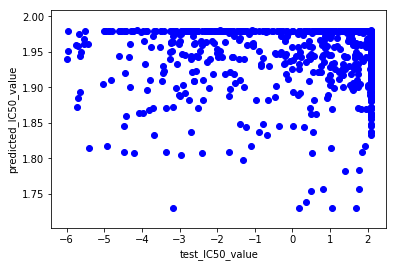

In [22]:
plt.scatter(test_label_array,y_lin,c='blue')
plt.xlabel('test_IC50_value')
plt.ylabel('predicted_IC50_value')
plt.savefig(workdir + '//191205_EC_11K_znorm_SVR_scatter_plot.png')

In [23]:
rse = ((test_label_array-y_lin)**2).sum()
mse = np.mean((test_label_array-y_lin)**2)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 2.3661491655069797


In [24]:
from scipy.stats import linregress
linregress(b[0], a[0])

LinregressResult(slope=0.0033333750497278607, intercept=1.9518111235766726, rvalue=0.16647405536884555, pvalue=1.6595766213672882e-08, stderr=0.0005863112088591077)